# Python-in-the-lab: packages and tools

In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
# %matplotlib inline

## NumPy

[NumPy](www.numpy.org) is the fundamental package for scientific computing with Python. It contains among other things:

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

* [A tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
* [The Numpy reference](https://docs.scipy.org/doc/numpy/reference/)
* [Numpy I/O](https://docs.scipy.org/doc/numpy/reference/routines.io.html)
* [Numpy Memmap: write on disk](https://docs.scipy.org/doc/numpy/reference/generated/numpy.memmap.html)
* [Numpy masked arrays](https://docs.scipy.org/doc/numpy/reference/routines.ma.html)

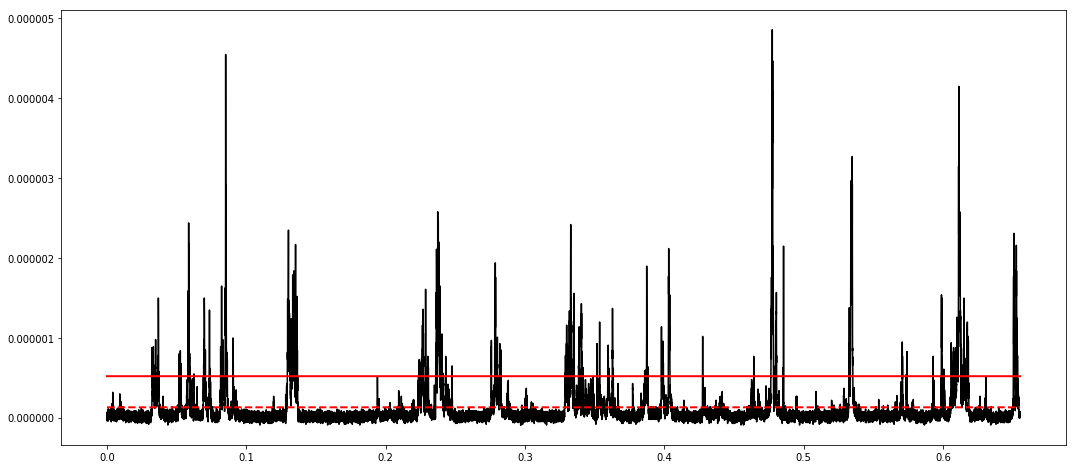

In [11]:
# Masked arrays
import numpy.ma as ma

# The file below contains a noise signal, made of a sequence of spikes (called Barkhausen jumps)
# The first line is the total time of the signal
# Note: the signal is negative, for simplicity use -signal
filename = "/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_time_200.dat"
data = -np.loadtxt(filename)
with open(filename) as f:
    header = f.readline()
max_time = float(header[1:])
time = np.linspace(0, max_time, len(data))
fig = plt.figure(figsize=(18,8))
plt.plot(time, data, 'k')
data_mean = np.mean(data)
plt.plot(time, data_mean * np.ones_like(time), '--r', lw=2)

# ahah, what if we want to consider just the values above the average, and calculate the new mean?
# mask = data < data_mean
# data_masked = ma.masked_array(data, mask)
data_masked = ma.masked_less_equal(data, data_mean)
new_mean = data_masked.mean()
plt.plot(time, new_mean * np.ones_like(time), '-r', lw=2);

In [12]:
data_masked[160:230]

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --,
                   1.770092773437532e-07, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --,
                   2.770092773437532e-07, 3.170092773437532e-07,
                   1.370092773437531e-07, 1.470092773437531e-07,
                   1.870092773437532e-07, --, --, --, --, --, --, --, --,
                   --, --, 1.470092773437531e-07, 1.670092773437531e-07,
                   --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True, False,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    T

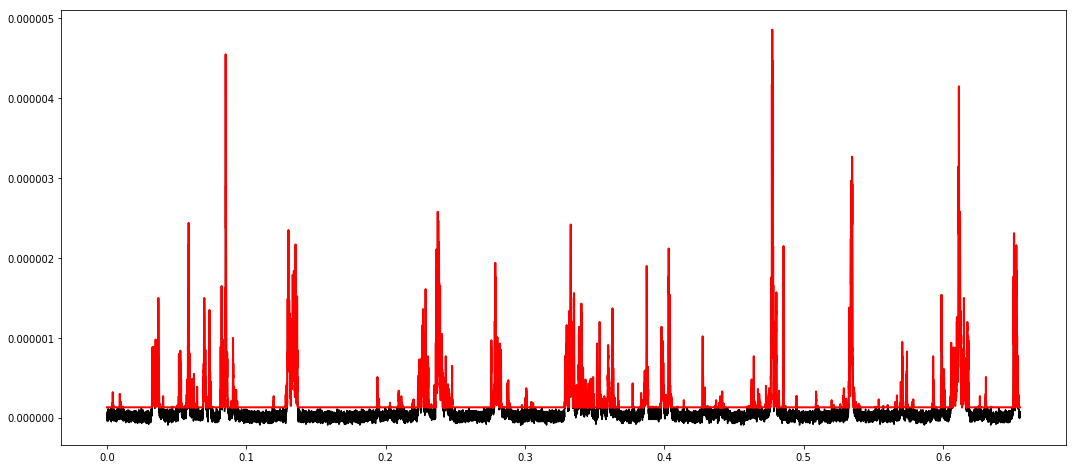

In [13]:
# It would be nice to plot the data above the original mean
# i.e. cut the data below it
fig = plt.figure(figsize=(18,8))
plt.plot(time, data, 'k')
plt.plot(time, data_masked.filled(data_mean), '-r', lw=2);

# Scipy

[Scipy](http://scipy.org/) SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, these are some of the core packages

* [The tutorial](https://docs.scipy.org/doc/scipy/reference/) Let's explore it, it is full of sub-packages
* [The scipy lectures](http://www.scipy-lectures.org/) Very nice!!!
* [Do you know Sympy?](http://www.sympy.org/en/index.html)

In [14]:
import sympy as sp
sp.init_printing()
from IPython.display import display

x = sp.symbols("x")
f = sp.sin(x)
display(f, sp.diff(f, x))
g = sp.diff(sp.sin(x)*sp.exp(-x), x)
display(g)
g_int = sp.integrate(g, x)
display(g_int)

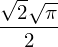

In [15]:
out = sp.integrate(sp.sin(x**2), (x, -sp.oo, sp.oo))
display(out)
# Not bad...

## HDF5, h5py, and pytables

The [h5py](http://docs.h5py.org/)  package is a Pythonic interface to the HDF5 binary data format.

HDF5 lets you store huge amounts of numerical data, and easily manipulate that data from NumPy. For example, you can slice into multi-terabyte datasets stored on disk, as if they were real NumPy arrays. Thousands of datasets can be stored in a single file, categorized and tagged however you want.

[PyTables](https://www.pytables.org/) is a package for managing hierarchical datasets and designed to efficiently and easily cope with extremely large amounts of data. 

PyTables is built on top of the HDF5 library, using the Python language and the NumPy package. It features an object-oriented interface that, combined with C extensions for the performance-critical parts of the code (generated using Cython), makes it a fast, yet extremely easy to use tool for interactively browse, process and search very large amounts of data

* [What is HDF5](https://support.hdfgroup.org/HDF5/whatishdf5.html)
* [Who uses HDF5](https://support.hdfgroup.org/HDF5/users5.html)

## Pickle

The [Pickle](https://docs.python.org/3/library/pickle.html) module implements a fundamental, but powerful algorithm for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” [1] or “flattening”, however, to avoid confusion, the terms used here are “pickling” and “unpickling”.

In [21]:
import pickle
# Let's save the masked array we made at the beginning
print(data_masked.shape)
with open("masked_array.pkl", 'wb') as f: # note the wb
    pickle.dump(data_masked, f)

(32768,)


In [22]:
# Let's check it if we really wrote the file
import glob
glob.glob1(".", "masked*")

['masked_array.pkl']

In [23]:
# Try to unpickle
with open("masked_array.pkl", 'rb') as pickle_file:
    m_array = pickle.load(pickle_file)

In [26]:
m_array[450:480]

masked_array(data=[--, --, --, --, --, --, --, --, 2.070092773437532e-07,
                   2.970092773437532e-07, 2.170092773437532e-07,
                   1.970092773437532e-07, 1.870092773437532e-07, --, --,
                   --, 1.770092773437532e-07, --, --, --, --, --, --, --,
                   --, --, --, --, --, 1.370092773437531e-07],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                   False, False, False, False, False,  True,  True,  True,
                   False,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True, False],
       fill_value=1e+20)

In [27]:
data_masked[450:480]

masked_array(data=[--, --, --, --, --, --, --, --, 2.070092773437532e-07,
                   2.970092773437532e-07, 2.170092773437532e-07,
                   1.970092773437532e-07, 1.870092773437532e-07, --, --,
                   --, 1.770092773437532e-07, --, --, --, --, --, --, --,
                   --, --, --, --, --, 1.370092773437531e-07],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                   False, False, False, False, False,  True,  True,  True,
                   False,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True, False],
       fill_value=1e+20)

## Scikit-image

The [Scikit-Image](https://scikit-image.org/) is a collection of algorithms for image processing. It is available free of charge and free of restriction. We pride ourselves on high-quality, peer-reviewed code, written by an active community of volunteers.

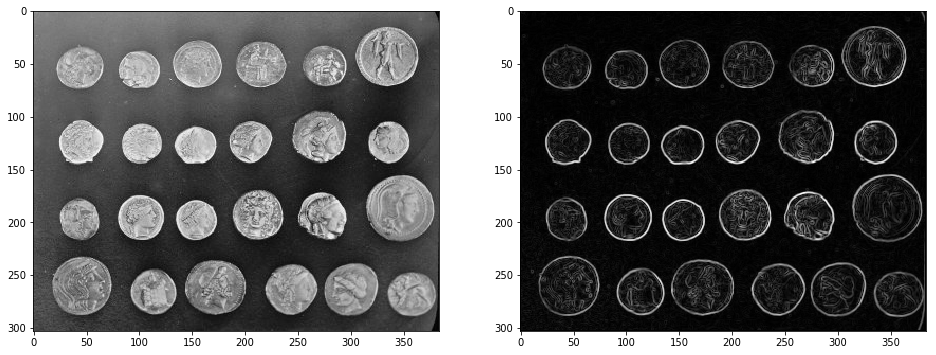

In [36]:
from skimage import data, filters

image = data.coins()
# ... or any other NumPy array!
edges = filters.sobel(image)
fig, axs = plt.subplots(1,2, figsize=(16,8))
axs[0].imshow(image, cmap='gray')
axs[1].imshow(edges, cmap='gray')
plt.show()

## Mahotas


[Mahotas](https://mahotas.readthedocs.io/en/latest/#) is a computer vision and image processing library for Python.

It includes many algorithms implemented in C++ for speed while operating in numpy arrays and with a very clean Python interface.

Mahotas currently has over 100 functions for image processing and computer vision and it keeps growing. Some examples of mahotas functionality:

* watershed
*        convex points calculations.
*        hit & miss. thinning
*        Zernike & Haralick, local binary patterns, and TAS features.
*        morphological processing
*        Speeded-Up Robust Features (SURF), a form of local features
*        thresholding
*        convolution.
*        Sobel edge detection.

## Open-cv

[OpenCV-python](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html) is based on the [Open Source Computer Vision Library](http://opencv.org), an open-source BSD-licensed library that includes several hundreds of computer vision algorithms. The document describes the so-called OpenCV 2.x API, which is essentially a C++ API, as opposite to the C-based OpenCV 1.x API. The latter is described in opencv1x.pdf.

OpenCV has a modular structure, which means that the package includes several shared or static libraries. The following modules are available:

* core - a compact module defining basic data structures, including the dense multi-dimensional array Mat and basic functions used by all other modules.
* imgproc - an image processing module that includes linear and non-linear image filtering, geometrical image transformations (resize, affine and perspective warping, generic table-based remapping), color space conversion, histograms, and so on.
* video - a video analysis module that includes motion estimation, background subtraction, and object tracking algorithms.
* calib3d - basic multiple-view geometry algorithms, single and stereo camera calibration, object pose estimation, stereo correspondence algorithms, and elements of 3D reconstruction.
* features2d - salient feature detectors, descriptors, and descriptor matchers.
* objdetect - detection of objects and instances of the predefined classes (for example, faces, eyes, mugs, people, cars, and so on).
* highgui - an easy-to-use interface to simple UI capabilities.
* videoio - an easy-to-use interface to video capturing and video codecs.
* gpu - GPU-accelerated algorithms from different OpenCV modules.


## Scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/index.html) is the Machine Learning in Python

*    Simple and efficient tools for data mining and data analysis
*    Accessible to everybody, and reusable in various contexts
*    Built on NumPy, SciPy, and matplotlib
*    Open source, commercially usable - BSD license

![Image](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)


## Scikit-Cuda

[Scikit-cuda](https://scikit-cuda.readthedocs.io/en/latest/) provides Python interfaces to many of the functions in the CUDA device/runtime, CUBLAS, CUFFT, and CUSOLVER libraries distributed as part of NVIDIA’s CUDA Programming Toolkit, as well as interfaces to select functions in the CULA Dense Toolkit. Both low-level wrapper functions similar to their C counterparts and high-level functions comparable to those in NumPy and Scipy are provided.

## PyCuda

[PyCuda](https://mathema.tician.de/software/pycuda/) PyCUDA lets you access Nvidia‘s CUDA parallel computation API from Python

In [16]:
try:
    import pycuda.autoinit
    import pycuda.driver as drv
    from pycuda.compiler import SourceModule

    
    mod = SourceModule("""
__global__ void multiply_them(float *dest, float *a, float *b)
{
  const int i = threadIdx.x;
  dest[i] = a[i] * b[i];
}
""")

    multiply_them = mod.get_function("multiply_them")

    a = numpy.random.randn(400).astype(numpy.float32)
    b = numpy.random.randn(400).astype(numpy.float32)

    dest = np.zeros_like(a)
    multiply_them(
        drv.Out(dest), drv.In(a), drv.In(b),
        block=(400,1,1), grid=(1,1))

    print(dest-a*b)
except:
    print("pyCuda not installed")

pyCuda not installed


## and so on...

[Check this](https://stxnext.com/blog/2018/09/20/most-popular-python-scientific-libraries/) and [also here](https://medium.com/activewizards-machine-learning-company/top-15-python-libraries-for-data-science-in-in-2017-ab61b4f9b4a7)

And, finally, if you are lost there is always [PyPi](https://pypi.org/)